In [1]:
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
input_shape = (224, 224, 3)

# Set the dataset directory
dataset_dir = r"C:\Users\m1355\Documents\WeChat Files\wxid_z0qpzwe8erfg22\FileStorage\File\2023-06\crc_skin_data\crc_skin_data"

# Set the batch size
batch_size = 4

In [3]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)


Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
def residual_block(inputs, num_filters):
    # Convolution Layers
    x = Conv2D(num_filters, kernel_size=(3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(num_filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    if inputs.shape[-1] != num_filters:
        shortcut = Conv2D(num_filters, kernel_size=(1, 1), padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = inputs

    # Residual connection
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    
    return x


In [6]:
def ResNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # Convolutional Layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(3, 3))(x)
    x = Activation('relu')(x)
    
    # Residual Blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)
    # Fully Connected Layers
    x = Dense(512, activation='relu')(x)
    #Create the model
    outputs = Dense(num_classes, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)

    return model


In [7]:
#Create the ResNet
num_classes = 1
model = ResNet(input_shape,num_classes)

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

Epoch 1/5
125/125 [==============================] - 8s 60ms/step - loss: 0.5102 - accuracy: 0.7460 - val_loss: 0.4994 - val_accuracy: 0.7780
Epoch 2/5
125/125 [==============================] - 7s 59ms/step - loss: 0.4634 - accuracy: 0.7780 - val_loss: 0.4911 - val_accuracy: 0.8240
Epoch 3/5
125/125 [==============================] - 8s 65ms/step - loss: 0.5161 - accuracy: 0.7520 - val_loss: 0.4284 - val_accuracy: 0.8040
Epoch 4/5
125/125 [==============================] - 8s 62ms/step - loss: 0.4982 - accuracy: 0.7620 - val_loss: 0.4103 - val_accuracy: 0.8100
Epoch 5/5
125/125 [==============================] - 8s 61ms/step - loss: 0.4931 - accuracy: 0.7640 - val_loss: 0.4192 - val_accuracy: 0.8000


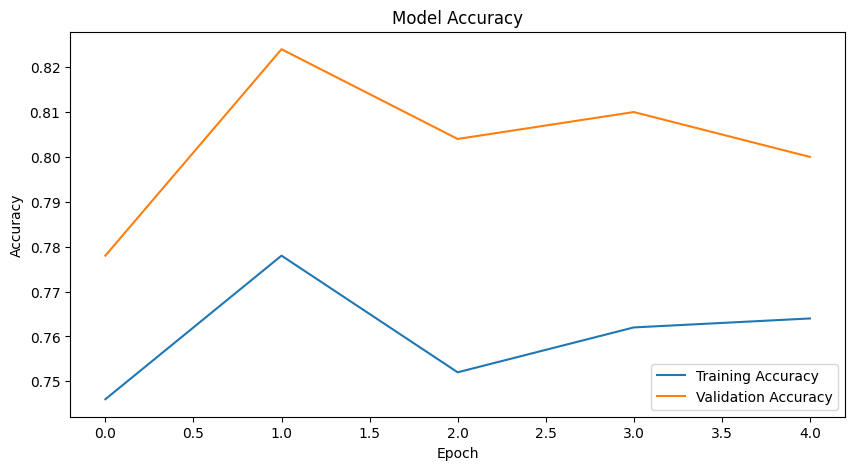

In [23]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()


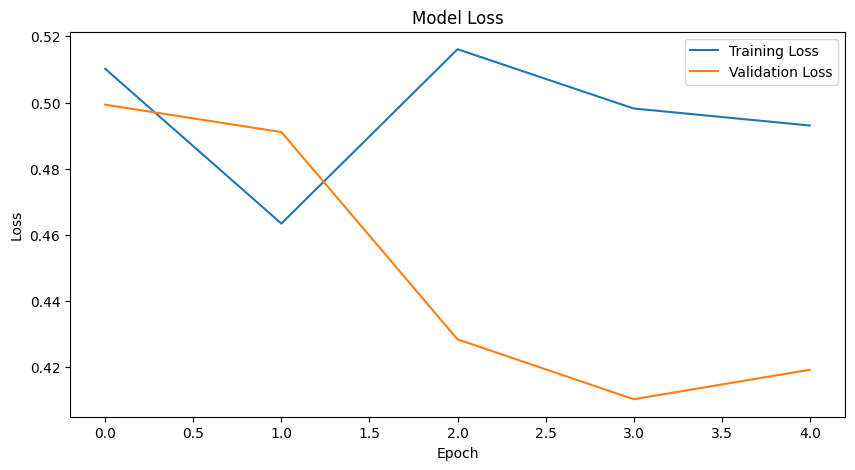

In [24]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [21]:
test_loss,test_accuracy = model.evaluate(test_generator)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_accuracy)

25/25 [==============================] - 0s 12ms/step - loss: 0.3018 - accuracy: 0.8500
Test Loss: 0.30183592438697815
Test Accuracy: 0.8500000238418579
